# Galaxy Multi-Image Classification with LeNet-5 



In [1]:
! pip install astroNN
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

     |████████████████████████████████| 9.3 MB 5.3 MB/s 
     |████████████████████████████████| 6.5 MB 9.1 MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284595 sha256=0c5049852fd3226c98339b774057f2c74228120ca84cde0171fdc37c836549cb
  Stored in directory: /root/.cache/pip/wheels/26/a4/7e/4cbf2a7f9cd51929da9d09345e8cd37c647b54825a1314dd2d
  Created wheel for astroquery: filename=astroquery-0.4.1-py3-none-any.whl size=3831872 sha256=0861c7bd833cc4bf2c7eb9d3bda02b679e971d21721f2da691bc847070163728
  Stored in directory: /root/.cache/pip/wheels/59/74/e3/a457b9b06b2cf6a0126f316459030ee535cfaa95a69bbcc36f
Successfully built astroNN astroquery
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


# Galaxy10 Dataset

The galaxy10 dataset is a dataset that contains 21785 69x69 pixels colored galaxy images with 10 different classes. The images from this dataset come from Sloan Digital Sky Survey and the labels come from Galaxy Zoo.

Each of the images within the dataset are classified under one of the 10 classes, however, there were discrepancies in the classes assigned to certain images from the human volunteers who were tasked with labelling the images which serves as empirical evidence that there is a high level of similarity in the images between the classes. To mitigate this issue, the Galaxy10 dataset does not include images where there was no definitive decision. (55% of votes casted by human volunteers towards one class)

In [2]:
images, labels = galaxy10.load_data()

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

x_train = x_train / 255.0
x_test = x_test / 255.0

Galaxy10.h5:  99%|█████████▉| 208M/210M [00:07<00:00, 32.7MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:08, 24.3MB/s]                           


Let's take a look at the dataset dimensions.

In [3]:
x_train.shape, x_test.shape

((17428, 69, 69, 3), (4357, 69, 69, 3))

Now, we know a bit more about our dataset. Here, we have a dataset of 17248 colored training images w/ dimensions of 69 by 69 and 4357 colored testing images w/ dimensions of 69 by 69. Let's take a look at a random selection of images within our dataset.

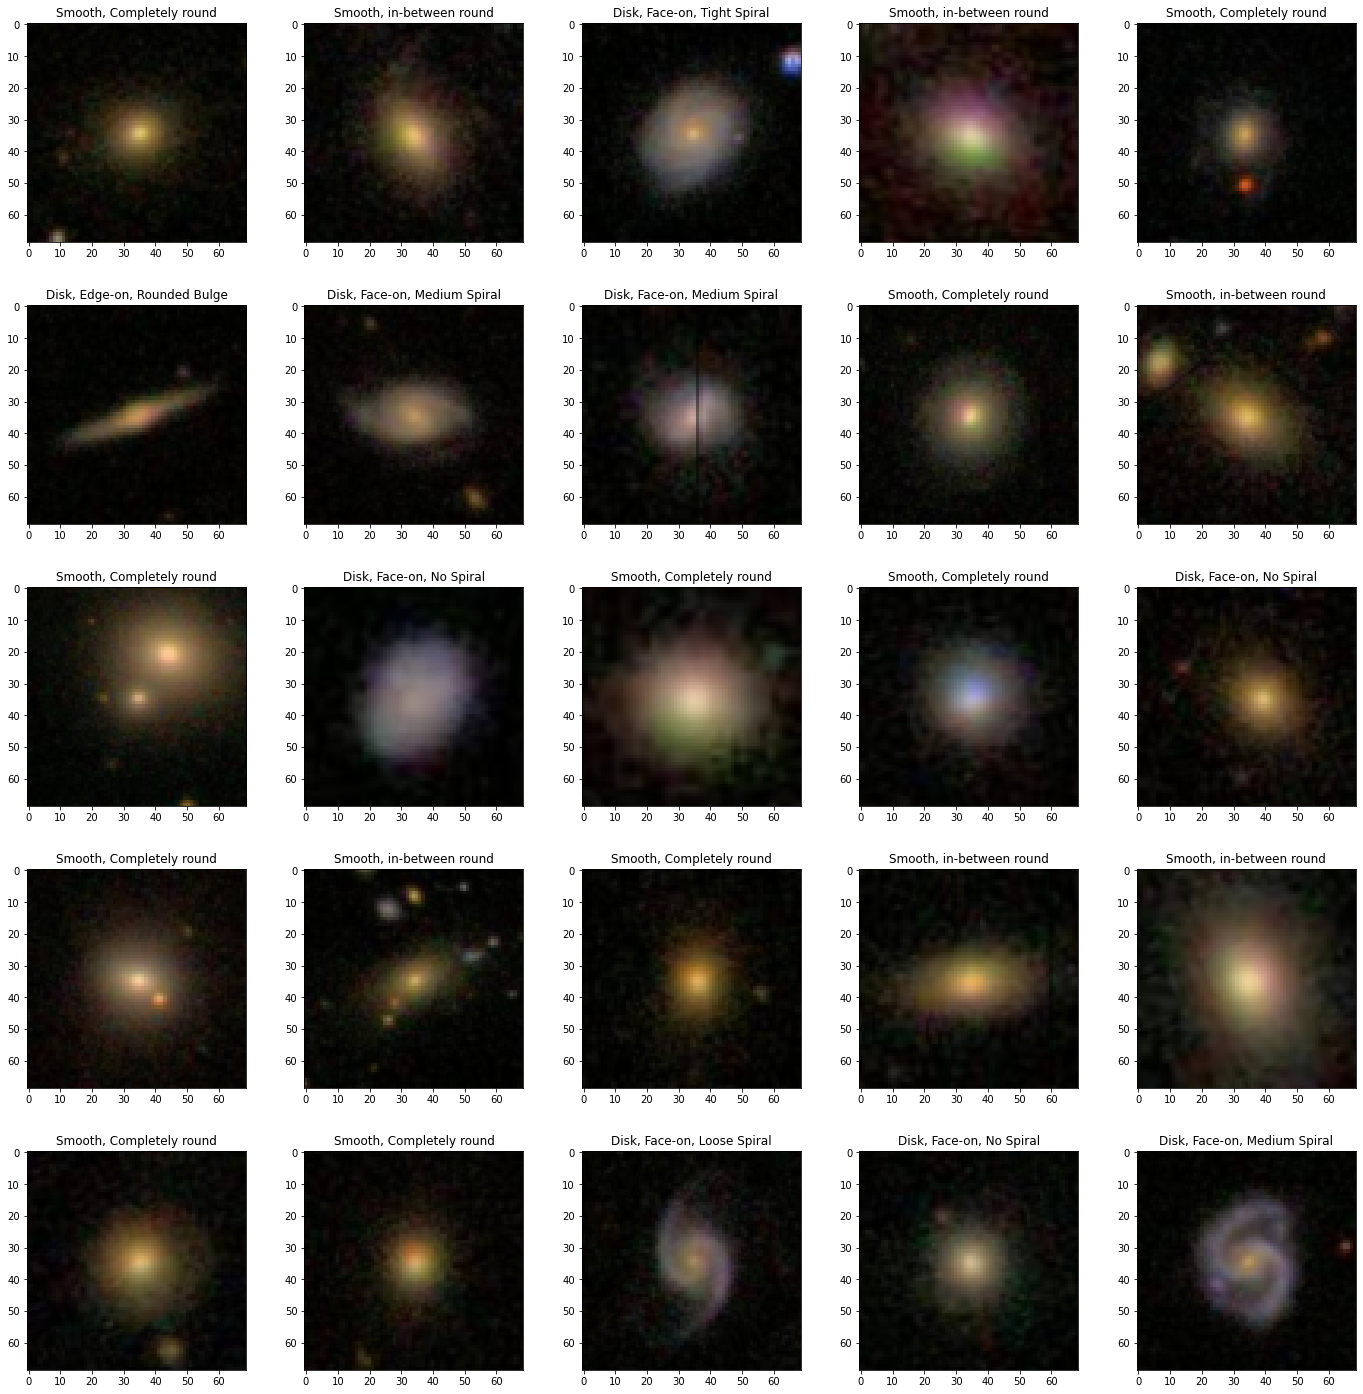

In [4]:
fig = plt.figure(figsize=(20,20)) 

for i in range(25):
    plt.subplot(5,5,i+1)    
    plt.imshow(x_train[i])
    plt.title(features[y_train[i]])
    fig.tight_layout(pad=3.0)
    
plt.show()

In [5]:
# Check class distribution

df = pd.DataFrame(data=labels)

counts = df.value_counts().sort_index()
print(counts)

0    3461
1    6997
2    6292
3     349
4    1534
5      17
6     589
7    1121
8     906
9     519
dtype: int64


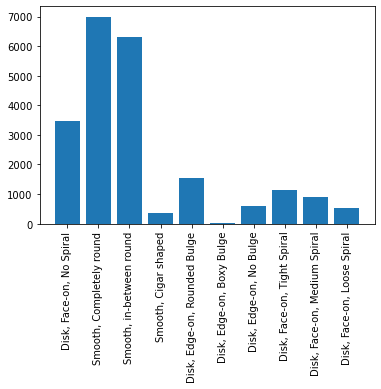

In [6]:
def class_distribution(x, y, labels):
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xticklabels(labels, rotation=90)
    plt.show()
    
class_distribution(features, counts, features)

#  Imbalanced Data; The Accuracy Paradox

Here, we have quite an unbalanced dataset. The number of images in each class range from 17 (min) in class 5 and 6997 (max) in class 1. The issue with data that has skewed class distributions is that accuracy is no longer an evaluation metric that correctly reflects the machine learning model's ability to classify the images. This is also known as the **accuracy paradox** which states that a model with a higher accuracy might have less predictive power than a model with a lower accuracy. 

To sum it up: accuracy may not always be the best metric to evaluate your model. As a result, it would be a more fair analysis if we used other evaluation metrics like precision or recall. 

**Precision**:  Precision = True Positive (TP) / True Positive (TP) + False Positive (FP)

**Recall**:  Recall = True Positive (TP) / True Positive (TP) + False Negative (FN)



In [7]:
model = Sequential()

# Baseline model to compare to LeNet-5
model.add(Flatten(input_shape=(69, 69, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model_optimizer = Adam(lr=0.001)

model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")
lol = model.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

Epoch 1/10
545/545 [==============================] - 5s 8ms/step - loss: 1.5526 - accuracy: 0.3852
Epoch 2/10
545/545 [==============================] - 5s 8ms/step - loss: 1.1570 - accuracy: 0.5763
Epoch 3/10
545/545 [==============================] - 4s 8ms/step - loss: 1.0198 - accuracy: 0.6320
Epoch 4/10
545/545 [==============================] - 4s 8ms/step - loss: 0.9472 - accuracy: 0.6616
Epoch 5/10
545/545 [==============================] - 4s 8ms/step - loss: 0.9030 - accuracy: 0.6775
Epoch 6/10
545/545 [==============================] - 5s 9ms/step - loss: 0.8766 - accuracy: 0.6884
Epoch 7/10
545/545 [==============================] - 5s 8ms/step - loss: 0.8422 - accuracy: 0.6967
Epoch 8/10
545/545 [==============================] - 4s 8ms/step - loss: 0.8982 - accuracy: 0.6812
Epoch 9/10
545/545 [==============================] - 5s 8ms/step - loss: 0.8436 - accuracy: 0.7003
Epoch 10/10
545/545 [==============================] - 4s 8ms/step - loss: 0.8436 - accuracy: 0.7003

In [8]:
# Predictions on baseline model 

predictions = model.predict(x_test)

for i in range(10):
    print("Actual:", features[y_test[i]])
    print("Prediction:", features[np.argmax(predictions[i])])
    print ("______")
    print()
        

Actual: Smooth, Completely round
Prediction: Smooth, Completely round
______

Actual: Smooth, in-between round
Prediction: Smooth, in-between round
______

Actual: Smooth, in-between round
Prediction: Smooth, in-between round
______

Actual: Smooth, in-between round
Prediction: Smooth, Completely round
______

Actual: Smooth, Completely round
Prediction: Smooth, Completely round
______

Actual: Smooth, Completely round
Prediction: Smooth, Completely round
______

Actual: Smooth, Completely round
Prediction: Smooth, Completely round
______

Actual: Smooth, Completely round
Prediction: Smooth, Completely round
______

Actual: Disk, Face-on, Medium Spiral
Prediction: Smooth, Completely round
______

Actual: Smooth, Completely round
Prediction: Smooth, Completely round
______



# LeNet-5 Architecture

An old but classic convolutional neural network architecture developed in 1998 by Yann Andre LeCun, Leon Bottou, Yoshua Bengio, and Patrick Haffner. When first developed, it was designed for the handwritten MNIST digits recognition and became the foundation for future architectures like AlexNet and VGG.

The first convolution block consists of two convolutional and average pooling layers which is succeeded by a flatten layer and then followed by 3 dense layers. 


In [9]:
model2 = Sequential()

# LeNet-5 conv-net architecture
model2.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=(69,69,3)))
model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh'))
model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model2.add(Flatten())
model2.add(Dense(units=120, activation='tanh'))
model2.add(Dense(units=84, activation='tanh'))
model2.add(Dense(units=10, activation='softmax'))

model_optimizer = Adam(lr=0.001)

reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

model2.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model2.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

Epoch 1/10
545/545 [==============================] - 31s 57ms/step - loss: 1.2890 - accuracy: 0.5107
Epoch 2/10
545/545 [==============================] - 31s 57ms/step - loss: 0.8573 - accuracy: 0.6915
Epoch 3/10
545/545 [==============================] - 31s 57ms/step - loss: 0.7298 - accuracy: 0.7319
Epoch 4/10
545/545 [==============================] - 31s 57ms/step - loss: 0.6344 - accuracy: 0.7678
Epoch 5/10
545/545 [==============================] - 31s 58ms/step - loss: 0.5647 - accuracy: 0.7939
Epoch 6/10
545/545 [==============================] - 31s 57ms/step - loss: 0.4893 - accuracy: 0.8214
Epoch 7/10
545/545 [==============================] - 31s 57ms/step - loss: 0.4242 - accuracy: 0.8463
Epoch 8/10
545/545 [==============================] - 31s 57ms/step - loss: 0.3660 - accuracy: 0.8686
Epoch 9/10
545/545 [==============================] - 31s 57ms/step - loss: 0.3078 - accuracy: 0.8890
Epoch 10/10
545/545 [==============================] - 46s 85ms/step - loss: 0.257

In [10]:
predict = model2.predict(x_test).argmax(axis=1)

for i in range(10):
    print("Actual:", features[y_test[i]])
    print("Prediction:", features[np.argmax(predict[i])])
    print("-----")
    print()

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Medium Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----



It looks like some of the galaxy classes are being confused for others. It's difficult for even humans to correctly classify each of the image classes. To gain a better understanding of the mistakes made, using confusion matrixes are helpful. We'll also be taking a look at the classification report here.

In [11]:
classification_report(y_test, predict)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.49      0.46      0.48       685\n           1       0.86      0.93      0.89      1433\n           2       0.85      0.81      0.83      1251\n           3       0.52      0.44      0.48        63\n           4       0.80      0.82      0.81       292\n           5       0.00      0.00      0.00         5\n           6       0.75      0.80      0.78       123\n           7       0.47      0.62      0.54       232\n           8       0.45      0.28      0.34       182\n           9       0.42      0.38      0.40        91\n\n    accuracy                           0.75      4357\n   macro avg       0.56      0.56      0.55      4357\nweighted avg       0.74      0.75      0.74      4357\n'

For improved legibility: I refactored the classification report.

In [12]:
print('                  precision  recall  f1-score   support\n\n           '
'0       0.54      0.50      0.52       728\n           '
'1       0.86      0.91      0.89      1375\n           '
'2       0.80      0.87      0.83      1243\n           '
'3       0.47      0.41      0.44        61\n           '
'4       0.73      0.81      0.77       296\n           '
'5       0.00      0.00      0.00         6\n           '
'6       0.74      0.73      0.73       132\n           '
'7       0.46      0.34      0.39       211\n           '
'8       0.40      0.27      0.32       187\n           '
'9       0.53      0.36      0.43       118\n    '
' macro avg     0.55      0.52      0.53      4357\n' 
'  weighted avg     0.72      0.74      0.73      4357\n'
'  accuracy: 0.74      4357\n')

                  precision  recall  f1-score   support

           0       0.54      0.50      0.52       728
           1       0.86      0.91      0.89      1375
           2       0.80      0.87      0.83      1243
           3       0.47      0.41      0.44        61
           4       0.73      0.81      0.77       296
           5       0.00      0.00      0.00         6
           6       0.74      0.73      0.73       132
           7       0.46      0.34      0.39       211
           8       0.40      0.27      0.32       187
           9       0.53      0.36      0.43       118
     macro avg     0.55      0.52      0.53      4357
  weighted avg     0.72      0.74      0.73      4357
  accuracy: 0.74      4357



From this report, we can tell that our model has a high precision and recall for classifying classes 0, 1, 2, 4 (specifically 1 and 2). Notice how classes 1 and 2 also had the most training and testing samples too. On the other end of the spectrum, the model has a very low precision and recall (0) for class 5 where there were only 6 testing samples. Plotting a confusion matrix will provide further transparency on what those 6 testing samples were predicted as.

Text(33.0, 0.5, 'True class')

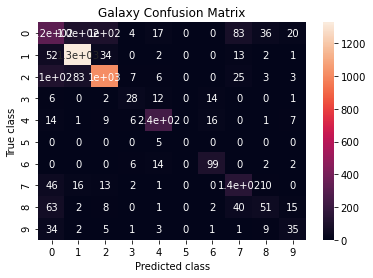

In [13]:
matrix = confusion_matrix(y_test, predict)
sns.heatmap(matrix, annot=True)
plt.title('Galaxy Confusion Matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')

The model did well with predicting class 1 and 2 images! No surprising since they're the classes with the most samples. 0 and 4 didn't do too bad either. Our model consistently confused class 0 for class 7 (76 samples), class 1 and 2 were also frequently predcited for class 0. Also, the model had issues with classifying class 8, often mistaking it with class 0 and 7. Let's look into that. Class 8 is the Disk, Face-on, Medium Spiral, class 0 is Disk, Face-on, No Spiral, and class 7 is Disk, Face-on, Tight Spiral. Taking a look at the images visualized above, it's quite easy to discern why, these images look quite similar.